In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(r'D:\Projects\VsCode\Python\img_processing_system\img\lena.jpg')

# Convert image to RGB (OpenCV loads in BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# 纹理

In [ ]:
from skimage.feature import graycomatrix, graycoprops

# Compute GLCM
glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Extract texture features from the GLCM
contrast = graycoprops(glcm, prop='contrast')
dissimilarity = graycoprops(glcm, prop='dissimilarity')
homogeneity = graycoprops(glcm, prop='homogeneity')
energy = graycoprops(glcm, prop='energy')

In [ ]:
print(contrast)
print(dissimilarity)
print(homogeneity)
print(energy)
print(f"Contrast: {contrast[0, 0]}")
print(f"Dissimilarity: {dissimilarity[0, 0]}")
print(f"Homogeneity: {homogeneity[0, 0]}")
print(f"Energy: {energy[0, 0]}")

# 形状

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours on the original image
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Display the image with contours
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

In [9]:
# Initialize SIFT detector
sift = cv2.SIFT_create()
# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(image_rgb, None)
print(keypoints)
print(descriptors)


(< cv2.KeyPoint 000001EE7F7BE5E0>, < cv2.KeyPoint 000001EE7F43EA00>, < cv2.KeyPoint 000001EE1306CA80>, < cv2.KeyPoint 000001EE1306CA50>, < cv2.KeyPoint 000001EE1306CC60>, < cv2.KeyPoint 000001EE1306CC00>, < cv2.KeyPoint 000001EE1306CBD0>, < cv2.KeyPoint 000001EE1306CC30>, < cv2.KeyPoint 000001EE1306C9C0>, < cv2.KeyPoint 000001EE1306C9F0>, < cv2.KeyPoint 000001EE1306DC20>, < cv2.KeyPoint 000001EE1306DC50>, < cv2.KeyPoint 000001EE1306DD70>, < cv2.KeyPoint 000001EE1306DD40>, < cv2.KeyPoint 000001EE1306DD10>, < cv2.KeyPoint 000001EE1306DCE0>, < cv2.KeyPoint 000001EE1306DCB0>, < cv2.KeyPoint 000001EE1306DC80>, < cv2.KeyPoint 000001EE1306CAE0>, < cv2.KeyPoint 000001EE1306CA20>, < cv2.KeyPoint 000001EE1306CCC0>, < cv2.KeyPoint 000001EE1306DB90>, < cv2.KeyPoint 000001EE1306DB60>, < cv2.KeyPoint 000001EE1306DB30>, < cv2.KeyPoint 000001EE1306CCF0>, < cv2.KeyPoint 000001EE1306CD20>, < cv2.KeyPoint 000001EE1306F390>, < cv2.KeyPoint 000001EE1306DDA0>, < cv2.KeyPoint 000001EE1306DDD0>, < cv2.KeyPoin

## 最小外接矩形


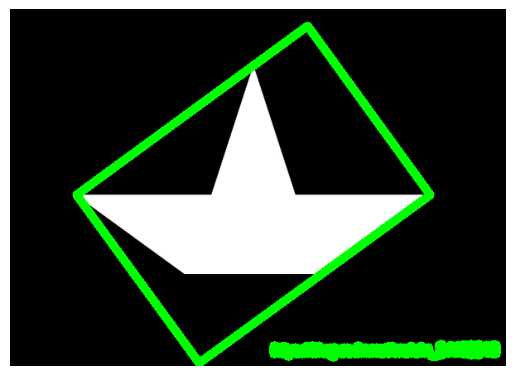

In [ ]:
import cv2
import numpy as np

imgpath = 'D:\Projects\VsCode\Python\img_processing_system\img\poly.png'
# 读取图片
image = cv2.imread(imgpath)
# 转换为灰度图
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)  
contours, _ = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cont in contours:
	# 对每个轮廓点求最小外接矩形
    rect = cv2.minAreaRect(cont)
    
    # cv2.boxPoints可以将轮廓点转换为四个角点坐标
    box = cv2.boxPoints(rect)
    # 这一步不影响后面的画图，但是可以保证四个角点坐标为顺时针
    startidx = box.sum(axis=1).argmin()
    box = np.roll(box,4-startidx,0)
    # 在原图上画出预测的外接矩形
    box = box.reshape((-1,1,2)).astype(np.int32)
    cv2.polylines(image,[box],True,(0,255,0),10)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:

cnt = np.array([[1,1],[4,1],[1,2],[4,2]]) # 必须是array数组的形式，疑问：这个点集是轮廓点集
rect = cv2.minAreaRect(cnt) 
print(rect[0])
print(rect[1][0])
print(rect[1][1])
print(rect[2])



(2.5, 1.5)
1.0
3.0
90.0


In [ ]:
#src：灰度图像
# (segments_np == segment_id).shape = (2000, 5834)，segments_np == segment_id的结果ndarray中元素的值为True或False，(segments_np == segment_id) 相当于二值图
# retval, dst = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY) # dst：二值图像 
contours, hierarchy = cv2.findContours(image) # image:输入的二值图像（通常为经过阈值处理或边缘检测后的图像）。contours`: 检测到的轮廓列表
rect = cv2.minAreaRect(points) # points: 输入的轮廓点集

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'findContours'
> Overload resolution failed:
>  - image data type = bool is not supported
>  - Expected Ptr<cv::UMat> for argument 'image'


# 从这里继续
参考文档：https://m.runoob.com/opencv/opencv-image-contour-detection.html

In [ ]:
mask = [
    [False, True, True, True, False],
    [False, True, True, True, False],
    [False, False, True, True, False],
    ]

# 2. 转为 OpenCV 可用的二值图 (0 或 255, uint8)
binary_img = np.array(mask).astype(np.uint8) * 255
contours, hierarchy = cv2.findContours(binary_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
for con in contours:
    print(con)
rect = cv2.minAreaRect(contours[0])
print(rect[0])
print(rect[1][0])
print(rect[1][1])
print(rect[2])

1
[[[1 0]]

 [[1 1]]

 [[2 2]]

 [[3 2]]

 [[3 0]]]
(2.0, 1.0)
2.0
2.0
90.0
